# SVM
---

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [95]:
from sklearn import datasets

data = datasets.load_breast_cancer()
type(data)

sklearn.utils.Bunch

In [96]:
data.keys()  # data - 딕셔너리 타입

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [97]:
data['feature_names'], len(data['feature_names'])

(array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
        'mean smoothness', 'mean compactness', 'mean concavity',
        'mean concave points', 'mean symmetry', 'mean fractal dimension',
        'radius error', 'texture error', 'perimeter error', 'area error',
        'smoothness error', 'compactness error', 'concavity error',
        'concave points error', 'symmetry error',
        'fractal dimension error', 'worst radius', 'worst texture',
        'worst perimeter', 'worst area', 'worst smoothness',
        'worst compactness', 'worst concavity', 'worst concave points',
        'worst symmetry', 'worst fractal dimension'], dtype='<U23'),
 30)

In [98]:
df_X = pd.DataFrame(data.data, columns = data.feature_names)
df_X.shape

(569, 30)

In [99]:
df_y = pd.DataFrame(data.target, columns=['target'])
df_y.shape

(569, 1)

In [100]:
df_X.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

In [101]:
df_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [102]:
df_y.value_counts()

target
1         357
0         212
dtype: int64

#### 학습/테스트 데이터 분리

In [103]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size = 0.2, shuffle=True, random_state=2022, stratify = df_y)   # stratify : 학습/테스트 데이터에 비슷한 분포로 줌

In [72]:
X_train.shape, X_test.shape

((455, 30), (114, 30))

#### 학습

In [73]:
# 스케일링
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(X_train)
X_train_scaled = ss.transform(X_train)
# X_test_scaled = ss.transform(X_test)
y_train = y_train.values.reshape(-1)   # y_train의 차원 변경

### 선형 svm
---

In [74]:
# 선형 svm
from sklearn import svm

clf = svm.SVC(kernel='linear')  # 선형 SVM 분류 알고리즘

clf.fit(X_train_scaled, y_train)

SVC(kernel='linear')

In [75]:
y_train.shape

(455,)

In [76]:
X_test_scaled = ss.transform(X_test)
y_test = y_test.values.reshape(-1) # y_test.values : 데이터프레임으로 만들어서 2차원으로 나옴, reshape으로 1차원으로 변경, 시리즈로 만들었으면 1차원

In [77]:
y_pred = clf.predict(X_test_scaled)

#### 정확도

In [78]:
from sklearn.metrics import accuracy_score
print(f'정확도 : {accuracy_score(y_test, y_pred)}')

정확도 : 0.9912280701754386


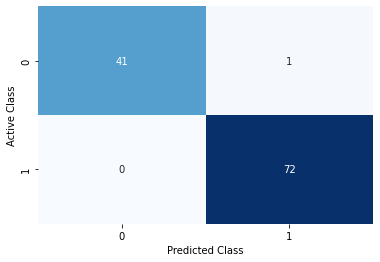

In [79]:
# confusion matrix
from sklearn.metrics import confusion_matrix

cfm = confusion_matrix(y_test, y_pred)   # (정답값, 예측값)

plt.figure(figsize=(6,4))
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='Blues')  # fmt : 포멧을 int형으로 설정
plt.ylabel('Active Class')
plt.xlabel('Predicted Class')
plt.show()

### RBF
---


In [80]:
clf = svm.SVC(kernel='rbf',C=1.0, gamma='scale')
clf.fit(X_train_scaled, y_train)  # 스케일 된 값

SVC()

In [81]:
y_pred = clf.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.9912280701754386

#### 파라미터 조정

In [82]:
clf = svm.SVC(kernel='rbf',C=1.0, gamma=100)
clf.fit(X_train_scaled, y_train)  
y_pred = clf.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.631578947368421

그리드 서치

In [83]:
from sklearn.model_selection import GridSearchCV

param = {
    'C' : range(1,100),
    'gamma': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1., 5],  # 그리드서치 범위 지정
    'kernel' : ['rbf']
}

model = svm.SVC()
grid = GridSearchCV(model,param, refit = True)  
# refit=True : 범위 안에서 최상의 결과를 찾아서 모델을 다시 학습, False면 gamma값을 찾기만 하고 학습을 직접 시켜야 함
grid.fit(X_train_scaled, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': range(1, 100),
                         'gamma': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0, 5],
                         'kernel': ['rbf']})

In [84]:
grid.best_params_

{'C': 3, 'gamma': 0.05, 'kernel': 'rbf'}

In [85]:
best_clf = grid.best_estimator_

In [86]:
grid.best_score_

0.9780219780219781

In [87]:
y_pred = best_clf.predict(X_test_scaled)

In [88]:
accuracy_score(y_test, y_pred)

0.9824561403508771

랜덤 서치

In [89]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

param = {
    'C' : uniform(),
    'gamma': uniform(),  # 랜덤 서치는 scipy uniform으로 분포곡선을 그려서 사용
    'kernel' : ['rbf']
}

model = svm.SVC()
rs = RandomizedSearchCV(model,param, refit = True)  
rs.fit(X_train_scaled, y_train)

RandomizedSearchCV(estimator=SVC(),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001FD1136F040>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001FD112C40D0>,
                                        'kernel': ['rbf']})

In [90]:
rs.best_params_

{'C': 0.781508050408469, 'gamma': 0.045457919339073616, 'kernel': 'rbf'}

In [91]:
best_clf = rs.best_estimator_

In [92]:
y_pred = best_clf.predict(X_test_scaled)

In [93]:
accuracy_score(y_test, y_pred)6

SyntaxError: invalid syntax (2117999997.py, line 1)